# Лабораторная работа №3
Волков М.А.
Группа: М8О-407б-19

# Задание:
1. Реализовать выбранный ранее алгоритм»
2. Сранить результаты с алгоритмом из sklearn
3. Выбить больший скор по сравнению со значением скора, которое было получено на прошлой лабораторной работе
4. Выбрать «обратный» алгоритм (вместо классификации - регрессию и наоборот)
5. Выбрать любой табличный набор данных для «обратного» алгоритма. Набор данных должен быть у каждого свой, то есть датасеты не должны пересекаться.
6. Реализовать «обратный алгоритм»

# Обработка данных
Датасет [Car data](https://www.kaggle.com/datasets/goyalshalini93/car-data)

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [2]:
data = pd.read_csv('archive/CarPrice_Assignment.csv')

In [3]:
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


Можно заметить, что названия машин какие-то сложные. Давайте оставим у них только их марки.
Можно также заметить, что бренд машины всегда записан первым словом. Давайте воспользуемся этим фактом

In [4]:
def distribute(df, label, name_label, value_label):
    result = pd.DataFrame()
    result[name_label] = df[label].value_counts().index
    result[value_label] = df[label].value_counts().values
    return result

In [5]:
data["CarName"] = data["CarName"].apply(lambda x: x.split()[0])

In [6]:
car_names = distribute(data, "CarName", "name", "count")

Получилось примерно такое распределение

In [7]:
px.bar(car_names, y="count", x="name")

In [8]:
to_dummy_list = []
for col in data:
    if type(data[col][0]) is str:
        to_dummy_list.append(col)

figure = make_subplots(rows=5, cols=2)
for idx, col in enumerate(to_dummy_list[1:]):
    
    types = distribute(data, col, "type", "count")
    x_tab, y_tab = idx % 5, idx % 2
    figure.add_trace(go.Bar(x=types["type"].to_list(), y=types["count"].to_list(), name=col), row=x_tab + 1, col=y_tab + 1)

figure.update_layout(height=1000, width=800)
figure.show()


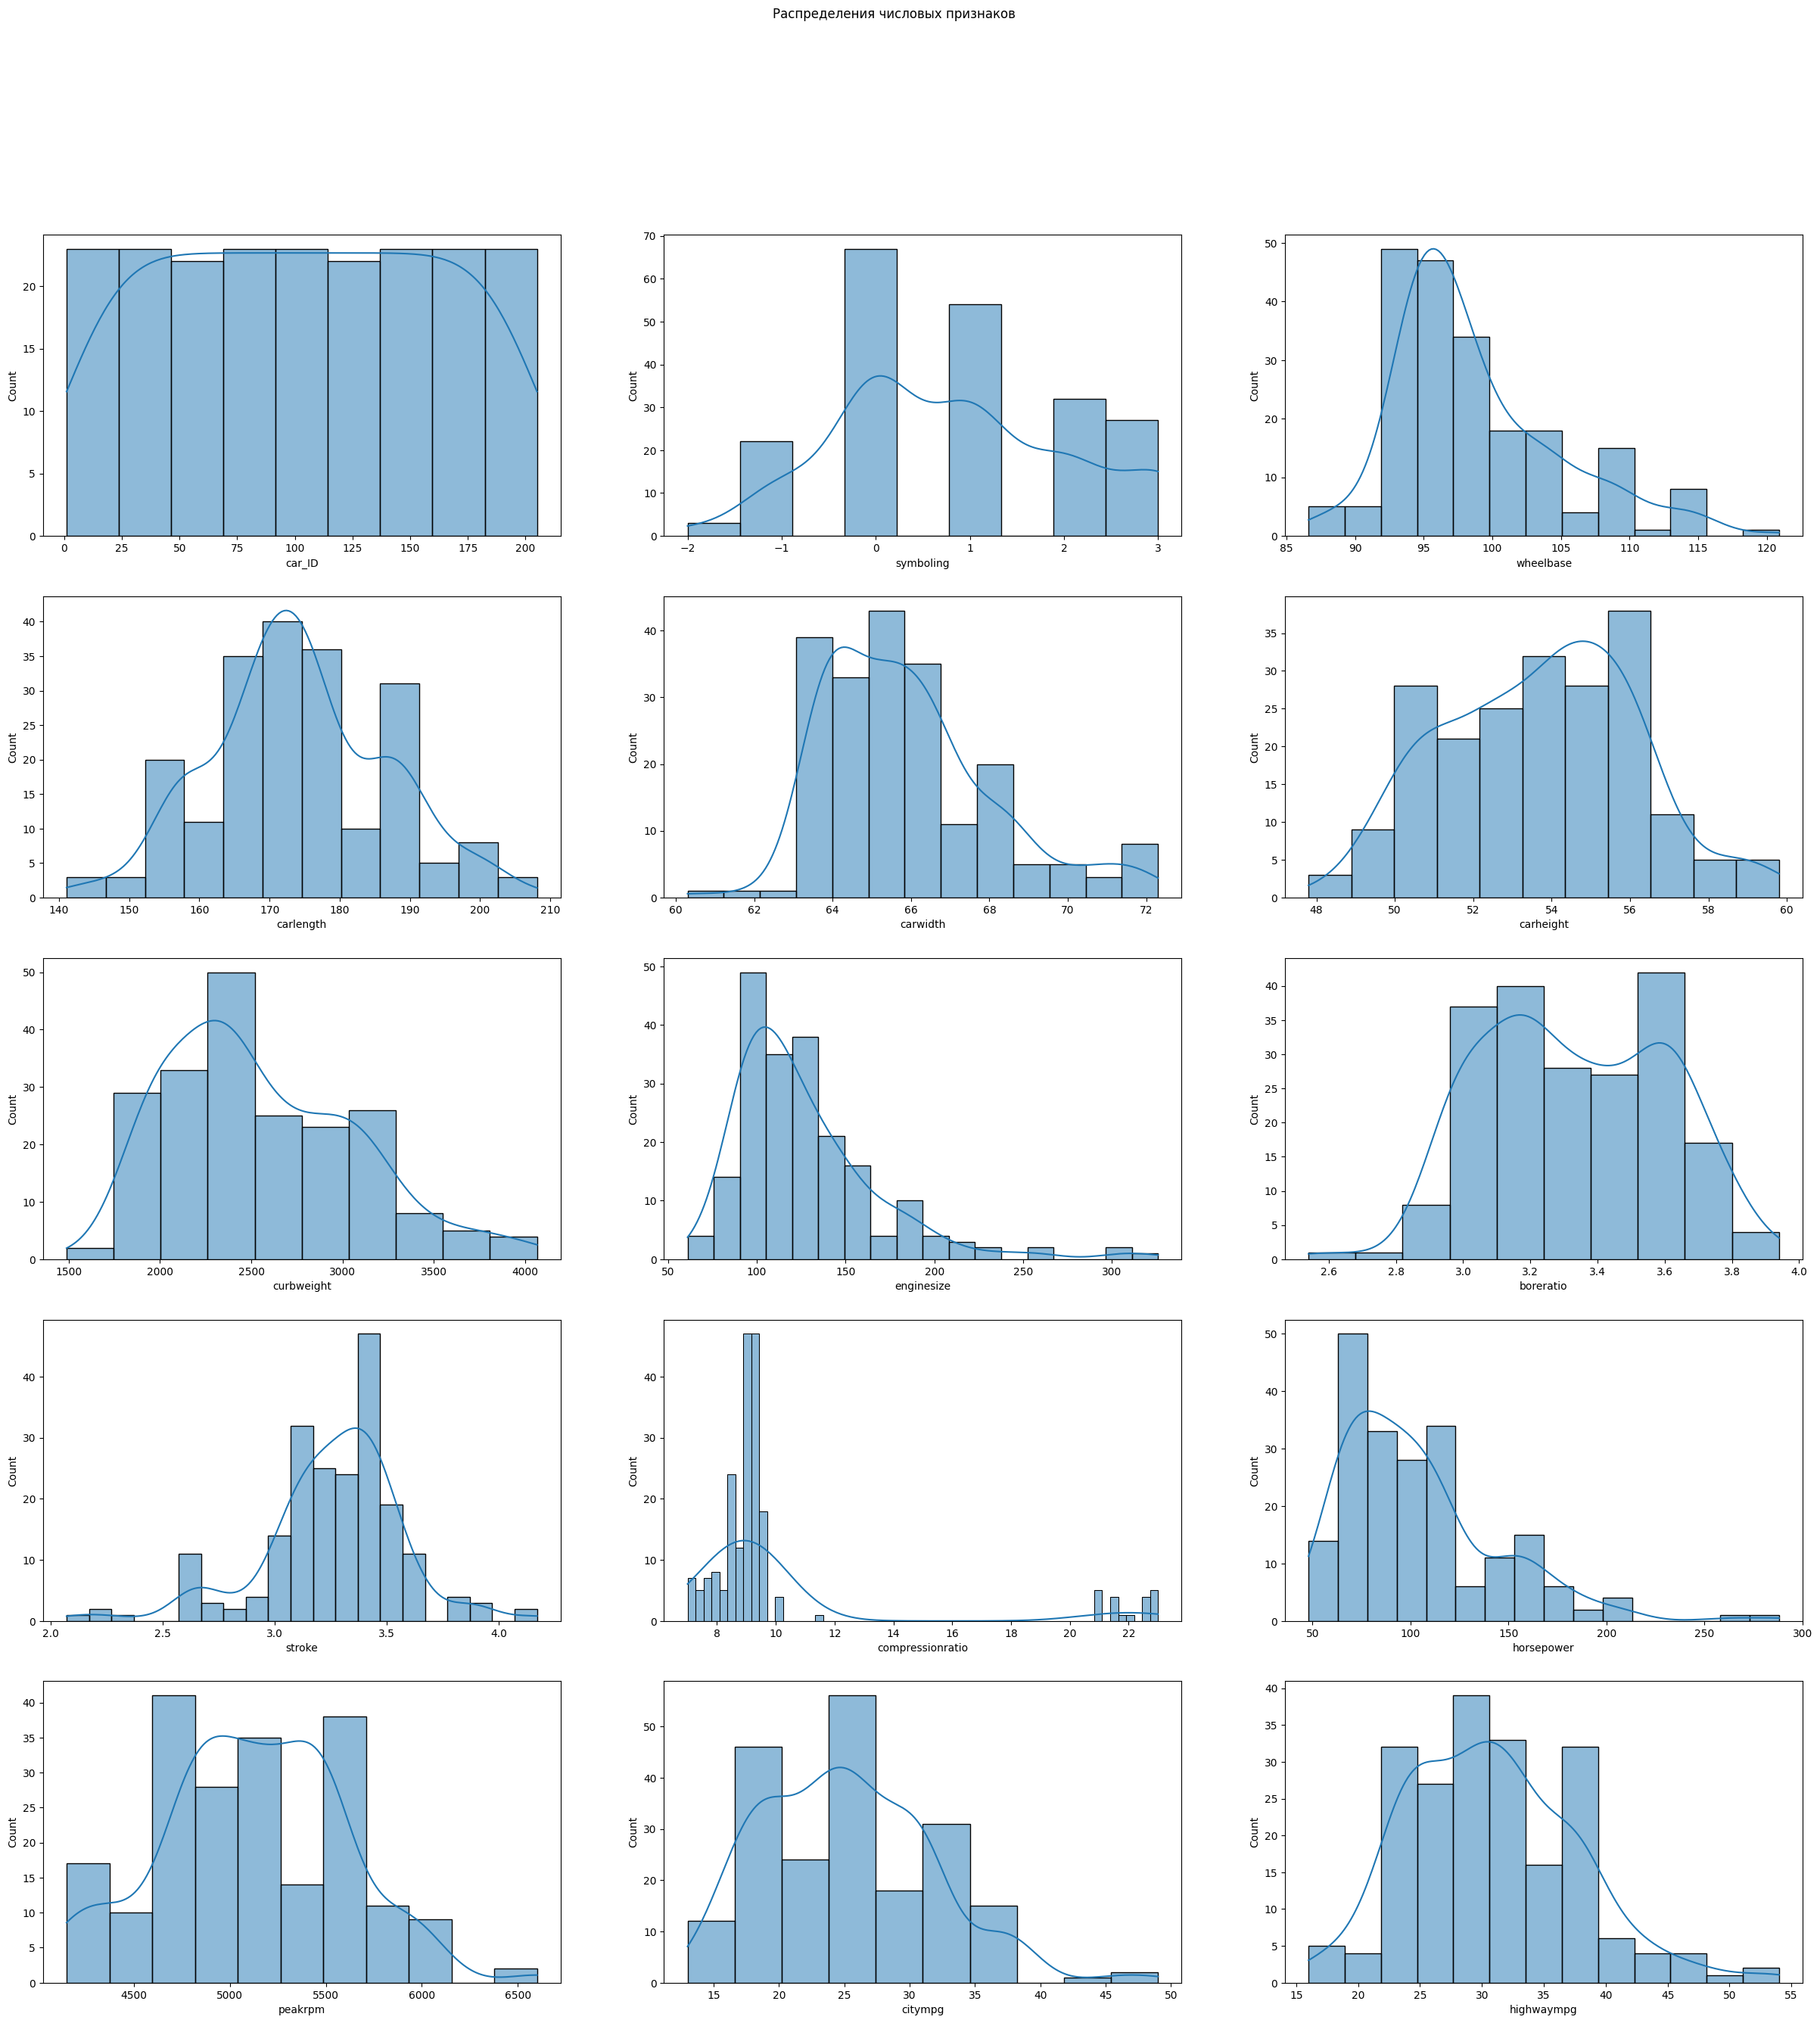

In [9]:
numeric_list = []
for col in data:
    if (type(data[col][0]) is np.int64 or type(data[col][0]) is np.float64) and col != "price":
        numeric_list.append(col)

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5, 3, figsize = (30, 30))
fig.suptitle('Распределения числовых признаков')
for i in range(len(numeric_list)):
    sns.histplot(data[numeric_list[i]], ax = ax[i//3][i%3], kde=True)
plt.show()

In [10]:
fig = px.imshow(data.corr())
fig.update_layout(height=1000, width=1000)
fig.show()

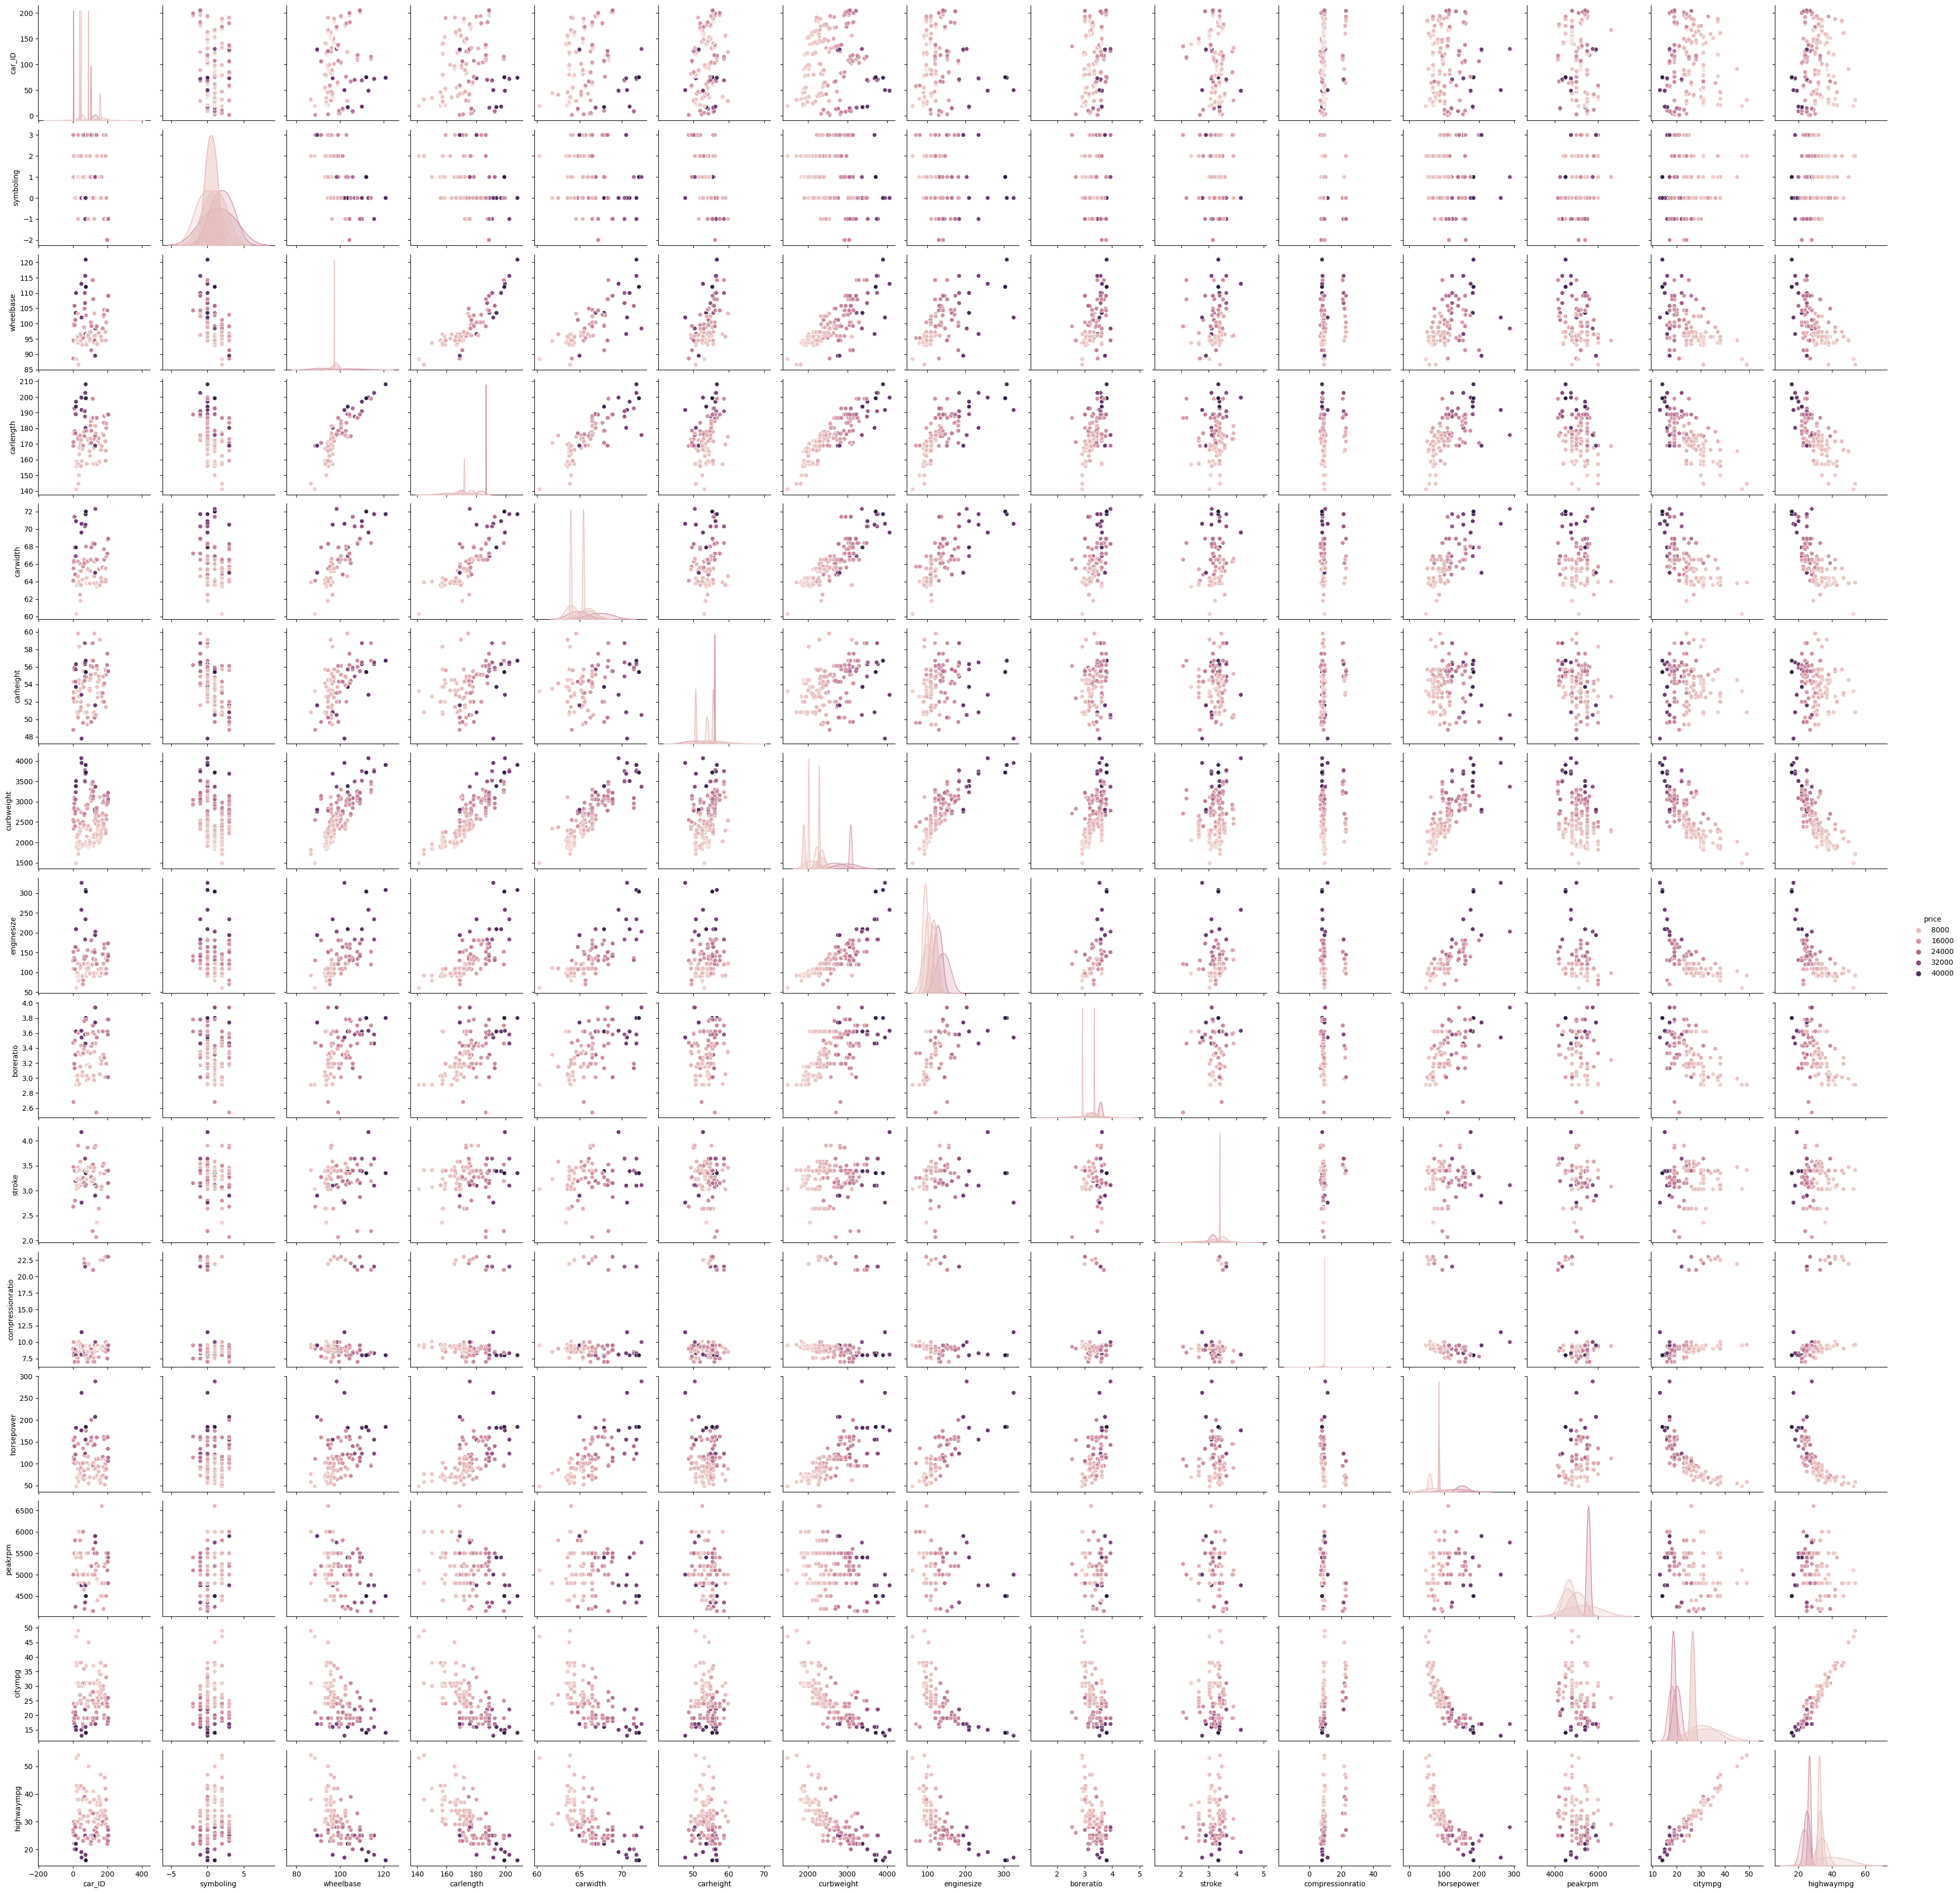

In [11]:
sns.pairplot(data=data, hue='price')

In [12]:
dummi_data = pd.get_dummies(data, prefix=to_dummy_list, columns=to_dummy_list)

In [13]:
dummi_data.head(10)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
5,6,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
6,7,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
7,8,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
8,9,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,...,0,0,0,0,0,0,0,1,0,0
9,10,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,...,0,0,0,0,0,0,0,1,0,0


# Обучение модели

In [14]:
from math import pi
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [15]:
import numpy as np


class Layer:
    def forward(self, *args):
        pass

    def backward(self, *args):
        pass


class Softmax(Layer):
    def forward(self, z):
        self.z = z
        zmax = z.max(axis=1, keepdims=True)
        expz = np.exp(z - zmax)
        Z = expz.sum(axis=1, keepdims=True)
        return expz / Z

    def backward(self, dp):
        p = self.forward(self.z)
        pdp = p * dp
        return pdp - p * pdp.sum(axis=1, keepdims=True)


class CrossEntropyLoss(Layer):
    def forward(self,p,y):
        self.p = p
        self.y = y
        p_of_y = p[np.arange(len(y)), y]
        log_prob = np.log(p_of_y)
        return -log_prob.mean()

    def backward(self,loss):
        dlog_softmax = np.zeros_like(self.p)
        dlog_softmax[np.arange(len(self.y)), self.y] -= 1.0/len(self.y)
        return dlog_softmax / self.p

class MeanSquareError:
    def forward(self, p, y):
        self.p = p
        self.y = y
        self.n = len(y)
        corr = np.zeros_like(p)
        for i, elem in enumerate(y):
            corr[i][elem] = 1.0
        self.corr = corr
        return np.sum((corr - p) ** 2)
    
    def backward(self, loss):
        return 2.0 * (self.p - self.corr)

class BinaryCrossEntropy(Layer):
    def forward(self, p, y):
        y = y.reshape((y.shape[0], 1))
        self.p = p
        self.y = y
        res = y * np.log(p) + (1 - y) * np.log(1 - p)
        return -np.mean(res)

    def backward(self, loss):
        res = (self.p - self.y) / (self.p * (1 - self.p))
        return res / self.p.shape[0]


class Linear(Layer):
    def __init__(self, nin, nout):
        sigma = 1.0 / np.sqrt(2.0 * nin)
        self.W = np.random.normal(0, sigma, (nout, nin))
        self.b = np.zeros((1, nout))
        self.dW = np.zeros_like(self.W)
        self.db = np.zeros_like(self.b)

    def forward(self, x):
        self.x = x
        return np.dot(x, self.W.T) + self.b

    def backward(self, dz):
        dx = np.dot(dz, self.W)
        dW = np.dot(dz.T, self.x)
        db = dz.sum(axis=0)
        self.dW = dW
        self.db = db
        return dx

    def update(self, lr):
        self.W -= lr * self.dW
        self.b -= lr * self.db


class Tanh(Layer):
    def forward(self,x):
        y = np.tanh(x)
        self.y = y
        return y
    def backward(self,dy):
        return (1.0-self.y**2)*dy


class ReLU(Layer):
    def forward(self, x):
        self.x = x
        return x * (x > 0)

    def backward(self, dy):
        return (1. * (self.x > 0)) * dy


class Sigmoid(Layer):
    def forward(self, x):
        self.y = 1.0 / (1.0 + np.exp(-x))
        return self.y

    def backward(self, dy):
        return self.y * (1.0 - self.y) * dy


import matplotlib.pyplot as plt
class Net:
    def __init__(self, loss_function=CrossEntropyLoss()):
        self.layers = []
        self.loss_func = loss_function

# ----Net's standart methods----
    def add(self,l):
        self.layers.append(l)

    def forward(self,x):
        for l in self.layers:
            x = l.forward(x)
        return x

    def backward(self,z):
        for l in self.layers[::-1]:
            z = l.backward(z)
        return z

    def update(self,lr):
        for l in self.layers:
            if 'update' in l.__dir__():
                l.update(lr)
# ----end Net's standart methods----

# ----loss functions----
    def forward_loss(self, x, y):
        p = self.forward(x)
        return self.loss_func.forward(p, y)

    def backward_loss(self, l):
        dp = self.loss_func.backward(l)
        return self.backward(dp)

    def _update_dry(self, x, y, step):
        self.update(step)
        loss = self.forward_loss(x, y)
        self.update(-step)
        return loss
# ----end loss functions----

# ----Net train----
    def _is_less_update_dry(self, x_dry, y_dry, step, l_dry, r_dry):
        lhs = (2.0 * l_dry + r_dry) / 3.0
        rhs = (l_dry + 2.0 * r_dry) / 3.0

        loss_lhs = self._update_dry(x_dry, y_dry, step * lhs)
        loss_rhs = self._update_dry(x_dry, y_dry, step * rhs)

        return loss_lhs < loss_rhs

    def train_epoch(self, epoch_train_x, train_labels, batch_size=100, step = 1e-7):
        for index in range(0, len(epoch_train_x), batch_size):
            xb = epoch_train_x[index:index + batch_size]
            yb = train_labels[index:index + batch_size]

            loss = self.forward_loss(xb, yb)
            self.backward_loss(loss)

            l = 1.0
            r = 5e2
            while r - l < 0.01:
                lhs = (2.0 * l + r) / 3.0
                rhs = (l + 2.0 * r) / 3.0
                if self._is_less_update_dry(xb,yb,step, lhs, rhs):
                    r = rhs
                else:
                    l = lhs
            self.update(r * step)

In [24]:
class LinearRegression(ClassifierMixin, BaseEstimator):
    def __init__(self, epoches=1, batch_size=10, SGD_step=0.001, nin=10):
        self.epoches = epoches
        self.batch_size = batch_size
        self.SGD_step = SGD_step
        self.nin = nin
        self.Net = Net(MeanSquareError())
        self.Net.add(Linear(nin, 1))
        self.Net.add(Sigmoid())

    def fit(self, X, y):
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        # Store the classes seen during fit
        # self.classes_ = unique_labels(y)

        self.X_ = X
        self.y_ = y
        self.is_fitted_ = True
        for _ in range(self.epoches):
            self.Net.train_epoch(X, y, self.batch_size, self.SGD_step)
        # Return the classifier
        return self

    def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self, ['X_', 'y_'])

        # Input validation
        X = check_array(X)

        y = self.Net.forward(X)
        res = np.where(y < 0.5, 0, 1)
        return res

    def getW(self):
        return self.Net.layers[0].W

    def getb(self):
        return self.Net.layers[0].b

In [19]:
x = dummi_data.drop(columns="price").to_numpy()
y = y = dummi_data['price'].to_numpy()

train_data, test_data, train_labels, test_labels = train_test_split(x, y, train_size=0.8, random_state=1)
train_data = normalize(train_data, norm="max", axis=0)
test_data = normalize(test_data, norm="max", axis=0)

In [23]:
train_labels

array([18399.   ,  7099.   , 10198.   ,  8195.   ,  7799.   , 40960.   ,
        6095.   , 18150.   , 13499.   , 28176.   , 11900.   , 24565.   ,
        9258.   ,  8845.   ,  6295.   , 11248.   ,  8845.   , 13860.   ,
        8238.   , 11845.   , 10898.   , 12764.   , 15750.   ,  7898.   ,
        6695.   ,  7299.   ,  9960.   , 19699.   , 11850.   , 10345.   ,
       36880.   , 15250.   ,  5348.   , 18950.   , 35550.   ,  9298.   ,
       18344.   , 17075.   ,  7395.   ,  7349.   ,  7609.   ,  5499.   ,
       11549.   ,  8921.   , 20970.   , 34028.   , 14399.   , 15985.   ,
        7788.   ,  8949.   ,  8499.   ,  9995.   , 12940.   , 21105.   ,
       12629.   , 15998.   ,  7975.   ,  8916.5  , 13200.   ,  7295.   ,
        9538.   , 13295.   ,  7898.   , 16900.   ,  6918.   , 21485.   ,
        5572.   , 18420.   , 16503.   ,  5572.   ,  6649.   ,  8495.   ,
       16500.   , 31600.   ,  6989.   ,  8778.   , 17710.   ,  8449.   ,
       13495.   ,  7738.   ,  6189.   , 16695.   , 

In [20]:
def scores(model, X, y_true):
    y_pred = model.predict(X)

    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    figure = plt.figure(figsize = (20, 5))
    matr = confusion_matrix(y_true, y_pred)
    ax = plt.subplot(1, 2, 1)
    ConfusionMatrixDisplay(matr).plot(ax = ax)
    ax = plt.subplot(1, 2, 2)

    RocCurveDisplay.from_estimator(estimator=model, X=X, y=y_true, name="ROC-кривая", ax=ax)

In [25]:
lin = LinearRegression(epoches=50)
lin.fit(train_data, train_labels)

ValueError: shapes (10,81) and (10,1) not aligned: 81 (dim 1) != 10 (dim 0)